In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.axes 

# 파일 읽어오기

In [3]:
dust_table = pd.read_csv('dust_table.csv')
dust_table

,항목명,경보단계,경보지역,경보권역,발령일,발령시간,발령농도,해제시간,해제농도
0,PM10,주의보,전북,군산권역,2020-02-22,11:00,159,17:00,91
1,PM10,주의보,충남,북부권역,2020-02-22,12:00,157,16:00,95
2,PM10,주의보,충북,남부권역,2020-03-19,13:00,199,15:00,79
3,PM10,주의보,전북,부안권역,2020-04-04,14:00,223,17:00,71
4,PM10,주의보,전북,남원권역,2020-04-04,17:00,158,18:00,97
...,...,...,...,...,...,...,...,...,...
95,PM10,주의보,경남,함양권역,2020-10-22,19:00,151,20:00,99
96,PM10,주의보,전북,고창권역,2020-10-22,16:00,180,18:00,91
97,PM10,주의보,전북,장수권역,2020-10-22,19:00,185,21:00,65
98,PM10,주의보,서울,서울권역,2020-10-22,14:00,152,17:00,98


In [4]:
dust_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   항목명     100 non-null    object
 1   경보단계    100 non-null    object
 2   경보지역    100 non-null    object
 3   경보권역    100 non-null    object
 4   발령일     100 non-null    object
 5   발령시간    100 non-null    object
 6   발령농도    100 non-null    int64 
 7   해제시간    100 non-null    object
 8   해제농도    100 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [5]:
## 발령일 dtype 변경 : object -> datetime
dust_table.발령일 = pd.to_datetime(dust_table.발령일)

In [6]:
dust_table

,항목명,경보단계,경보지역,경보권역,발령일,발령시간,발령농도,해제시간,해제농도
0,PM10,주의보,전북,군산권역,2020-02-22,11:00,159,17:00,91
1,PM10,주의보,충남,북부권역,2020-02-22,12:00,157,16:00,95
2,PM10,주의보,충북,남부권역,2020-03-19,13:00,199,15:00,79
3,PM10,주의보,전북,부안권역,2020-04-04,14:00,223,17:00,71
4,PM10,주의보,전북,남원권역,2020-04-04,17:00,158,18:00,97
...,...,...,...,...,...,...,...,...,...
95,PM10,주의보,경남,함양권역,2020-10-22,19:00,151,20:00,99
96,PM10,주의보,전북,고창권역,2020-10-22,16:00,180,18:00,91
97,PM10,주의보,전북,장수권역,2020-10-22,19:00,185,21:00,65
98,PM10,주의보,서울,서울권역,2020-10-22,14:00,152,17:00,98


In [7]:
## 발령농도가 가장 높은 날 : 행 추출
dust_table.발령농도.sort_values()

17    150
74    151
95    151
76    152
98    152
     ... 
15    253
22    282
54    321
56    337
73    380
Name: 발령농도, Length: 100, dtype: int64

In [8]:
dust_table.sort_values(by='발령농도', ascending=False)[:1]

,항목명,경보단계,경보지역,경보권역,발령일,발령시간,발령농도,해제시간,해제농도
73,PM10,경보,전북,임실권역,2020-05-14,17:00,380,22:00,111


In [9]:
## 발령농도가 가장 낮은 날 : 행 추출
dust_table.발령농도.sort_values()

17    150
74    151
95    151
76    152
98    152
     ... 
15    253
22    282
54    321
56    337
73    380
Name: 발령농도, Length: 100, dtype: int64

In [10]:
dust_table.sort_values(by='발령농도')[:1]

,항목명,경보단계,경보지역,경보권역,발령일,발령시간,발령농도,해제시간,해제농도
17,PM10,주의보,경남,함양권역,2020-04-04,17:00,150,19:00,74


- 2020년 2월 22일~2020년 10월 22일 기간 중 발령농도가 가장 높았던 날은 2020년 05월 14일로 380㎍/m3이었고, 발령농도가 가장 낮았던 날은 2020년 04월 04일로 150㎍/m3이었다.

In [11]:
dust_table[['발령일', '발령농도']]

,발령일,발령농도
0,2020-02-22,159
1,2020-02-22,157
2,2020-03-19,199
3,2020-04-04,223
4,2020-04-04,158
...,...,...
95,2020-10-22,151
96,2020-10-22,180
97,2020-10-22,185
98,2020-10-22,152


In [12]:
dust_table

,항목명,경보단계,경보지역,경보권역,발령일,발령시간,발령농도,해제시간,해제농도
0,PM10,주의보,전북,군산권역,2020-02-22,11:00,159,17:00,91
1,PM10,주의보,충남,북부권역,2020-02-22,12:00,157,16:00,95
2,PM10,주의보,충북,남부권역,2020-03-19,13:00,199,15:00,79
3,PM10,주의보,전북,부안권역,2020-04-04,14:00,223,17:00,71
4,PM10,주의보,전북,남원권역,2020-04-04,17:00,158,18:00,97
...,...,...,...,...,...,...,...,...,...
95,PM10,주의보,경남,함양권역,2020-10-22,19:00,151,20:00,99
96,PM10,주의보,전북,고창권역,2020-10-22,16:00,180,18:00,91
97,PM10,주의보,전북,장수권역,2020-10-22,19:00,185,21:00,65
98,PM10,주의보,서울,서울권역,2020-10-22,14:00,152,17:00,98


In [13]:
dust_table.발령일

0    2020-02-22
1    2020-02-22
2    2020-03-19
3    2020-04-04
4    2020-04-04
        ...    
95   2020-10-22
96   2020-10-22
97   2020-10-22
98   2020-10-22
99   2020-10-22
Name: 발령일, Length: 100, dtype: datetime64[ns]

In [14]:
dust_table.발령일.dt

In [15]:
dust_table.발령일.dt.month

0      2
1      2
2      3
3      4
4      4
      ..
95    10
96    10
97    10
98    10
99    10
Name: 발령일, Length: 100, dtype: int32

In [16]:
dust_table.발령일.dt.day

0     22
1     22
2     19
3      4
4      4
      ..
95    22
96    22
97    22
98    22
99    22
Name: 발령일, Length: 100, dtype: int32

In [17]:
## 연도별 그룹화
g_m = dust_table.groupby(dust_table.발령일.dt.month)

In [18]:
for g in g_m:
    print(g)

(2,     항목명 경보단계 경보지역  경보권역        발령일   발령시간  발령농도   해제시간  해제농도
0  PM10  주의보   전북  군산권역 2020-02-22  11:00   159  17:00    91
1  PM10  주의보   충남  북부권역 2020-02-22  12:00   157  16:00    95)
(3,     항목명 경보단계 경보지역  경보권역        발령일   발령시간  발령농도   해제시간  해제농도
2  PM10  주의보   충북  남부권역 2020-03-19  13:00   199  15:00    79)
(4,      항목명 경보단계 경보지역  경보권역        발령일   발령시간  발령농도   해제시간  해제농도
3   PM10  주의보   전북  부안권역 2020-04-04  14:00   223  17:00    71
4   PM10  주의보   전북  남원권역 2020-04-04  17:00   158  18:00    97
5   PM10  주의보   전북  순창권역 2020-04-04  16:00   217  18:00    76
6   PM10  주의보   전북  김제권역 2020-04-04  14:00   226  17:00    78
7   PM10  주의보   전북  진안권역 2020-04-04  16:00   216  19:00    69
8   PM10  주의보   세종  세종권역 2020-04-04  14:00   177  17:00    81
9   PM10  주의보   충남  북부권역 2020-04-04  12:00   223  17:00    97
10  PM10  주의보   전북  익산권역 2020-04-04  14:00   217  17:00    88
11  PM10  주의보   대전  서부권역 2020-04-04  16:00   162  18:00    98
12  PM10  주의보   대전  동부권역 2020-04-04  16:00   158  18:00    70

In [19]:
g_m.get_group(2)

,항목명,경보단계,경보지역,경보권역,발령일,발령시간,발령농도,해제시간,해제농도
0,PM10,주의보,전북,군산권역,2020-02-22,11:00,159,17:00,91
1,PM10,주의보,충남,북부권역,2020-02-22,12:00,157,16:00,95


In [20]:
g_m.indices

{2: array([0, 1], dtype=int64),
 3: array([2], dtype=int64),
 4: array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       dtype=int64),
 5: array([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
        53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
        70, 71, 72, 73], dtype=int64),
 6: array([74, 75, 76], dtype=int64),
 10: array([77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,
        94, 95, 96, 97, 98, 99], dtype=int64)}

In [21]:
## 월별 합
g_m.sum(numeric_only=True)

,발령농도,해제농도
발령일,,
2,316,186
3,199,79
4,6381,2741
5,7919,3487
6,460,273
10,4087,1805


In [22]:
## 월별 해제농도가 가장 높은 데이터(행)
g_m.sum(numeric_only=True).sort_values(by='해제농도', ascending=False)[:1]

,발령농도,해제농도
발령일,,
5,7919,3487


발령농도가 가장 높았던 달은 2020일 5월로 합이 7919㎍/m3이었고, 해제농도가 가장 높았던 달은 2020년 5월로 합이 3467㎍/m3이었다.

In [22]:
dust_table.발령일.dt.strftime('%m')

0     02
1     02
2     03
3     04
4     04
      ..
95    10
96    10
97    10
98    10
99    10
Name: 발령일, Length: 100, dtype: object

In [23]:
dust_table.발령일.dt.strftime('%d')

0     22
1     22
2     19
3     04
4     04
      ..
95    22
96    22
97    22
98    22
99    22
Name: 발령일, Length: 100, dtype: object

In [24]:
## [년-월]별 발령농도가 가장 높았던 년-월 추출(행)
g_y_m = dust_table.groupby(dust_table.발령일.dt.strftime('%y-%m'))

In [27]:
dust_table[dust_table['경보지역']=='전북'].count()

항목명     40
경보단계    40
경보지역    40
경보권역    40
발령일     40
발령시간    40
발령농도    40
해제시간    40
해제농도    40
dtype: int64

In [28]:
## 경보지역의 전북만 확인
j_b = dust_table[dust_table['경보지역']=='전북']
j_b

,항목명,경보단계,경보지역,경보권역,발령일,발령시간,발령농도,해제시간,해제농도
0,PM10,주의보,전북,군산권역,2020-02-22,11:00,159,17:00,91
3,PM10,주의보,전북,부안권역,2020-04-04,14:00,223,17:00,71
4,PM10,주의보,전북,남원권역,2020-04-04,17:00,158,18:00,97
5,PM10,주의보,전북,순창권역,2020-04-04,16:00,217,18:00,76
6,PM10,주의보,전북,김제권역,2020-04-04,14:00,226,17:00,78
7,PM10,주의보,전북,진안권역,2020-04-04,16:00,216,19:00,69
10,PM10,주의보,전북,익산권역,2020-04-04,14:00,217,17:00,88
15,PM10,주의보,전북,완주권역,2020-04-04,15:00,253,18:00,84
16,PM10,주의보,전북,무주권역,2020-04-04,17:00,173,20:00,70
20,PM10,주의보,전북,장수권역,2020-04-04,16:00,187,19:00,83


In [29]:
## 전북지역의 발령일(년-월)
j_b.발령일 = j_b.발령일.dt.strftime('%y-%m')
j_b

C:\Users\hi\AppData\Local\Temp\ipykernel_11940\4129342465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j_b.발령일 = j_b.발령일.dt.strftime('%y-%m')


,항목명,경보단계,경보지역,경보권역,발령일,발령시간,발령농도,해제시간,해제농도
0,PM10,주의보,전북,군산권역,20-02,11:00,159,17:00,91
3,PM10,주의보,전북,부안권역,20-04,14:00,223,17:00,71
4,PM10,주의보,전북,남원권역,20-04,17:00,158,18:00,97
5,PM10,주의보,전북,순창권역,20-04,16:00,217,18:00,76
6,PM10,주의보,전북,김제권역,20-04,14:00,226,17:00,78
7,PM10,주의보,전북,진안권역,20-04,16:00,216,19:00,69
10,PM10,주의보,전북,익산권역,20-04,14:00,217,17:00,88
15,PM10,주의보,전북,완주권역,20-04,15:00,253,18:00,84
16,PM10,주의보,전북,무주권역,20-04,17:00,173,20:00,70
20,PM10,주의보,전북,장수권역,20-04,16:00,187,19:00,83


In [48]:
# '경보단계'가 '주의보'인 데이터만 필터링
j_df = dust_table[dust_table['경보단계'] == '주의보']

# '발령시간' 열을 datetime 형식으로 변환
j_df['발령시간'] = pd.to_datetime(j_df['발령시간']).dt.hour

# 주의보 발령 시간대의 빈도 계산
h_counts = j_df['발령시간'].value_counts().sort_index()

# 가장 많은 주의보 발령 시간대 출력
m_ch = h_counts.idxmax()
print("가장 많은 주의보 발령 시간대:", m_ch, "시")

가장 많은 주의보 발령 시간대: 16 시


C:\Users\hi\AppData\Local\Temp\ipykernel_3808\1806308210.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  j_df['발령시간'] = pd.to_datetime(j_df['발령시간']).dt.hour
C:\Users\hi\AppData\Local\Temp\ipykernel_3808\1806308210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j_df['발령시간'] = pd.to_datetime(j_df['발령시간']).dt.hour


In [61]:
# 주의보 발령 시간대의 빈도 계산
h_counts = j_df['발령시간'].value_counts().sort_index()

# 시간대별 주의보 발령 횟수 출력
print(h_counts)

발령시간
7      1
8      1
9      6
10     1
11     1
12     5
13     9
14    12
15    12
16    22
17    15
18     6
19     5
20     2
21     1
Name: count, dtype: int64


# 가설

## [가설 1] 전북지역 발령농도, 해제농도는 4~5월이 가장 높을 것이다.

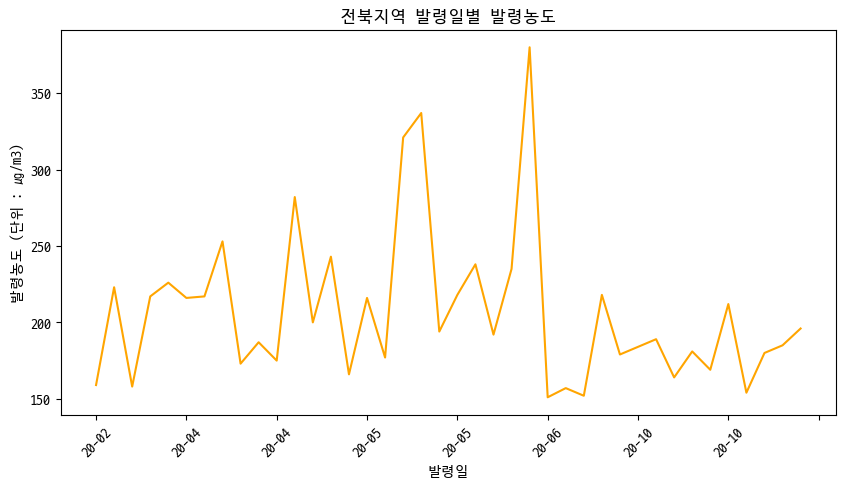

In [38]:
## 전북지역 발령일별 발령농도
plt.rc('font', family='d2coding')

j_b[['발령일', '발령농도']].plot(x='발령일',
                                figsize=(10, 5),
                               legend=False,
                               rot=45,
                               title='전북지역 발령일별 발령농도',
                               xlabel='발령일',
                               ylabel='발령농도 (단위 : ㎍/m3)',
                               color='orange',
                              )

plt.xticks(ha='center')
plt.show()

<Axes: xlabel='발령일', ylabel='발령농도'>

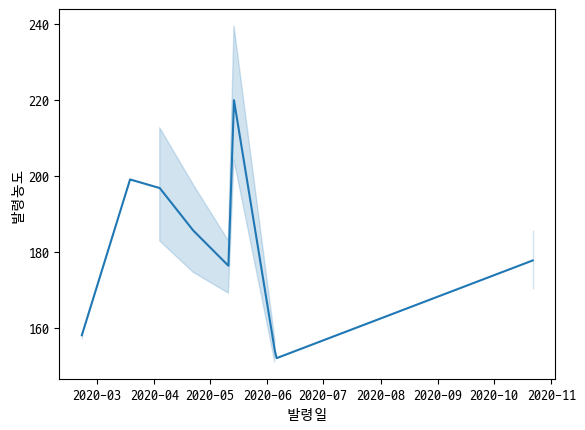

In [32]:
## 전북지역 발령일별 발령농도
sns.lineplot(data=dust_table,
             x='발령일',
             y='발령농도',
            )

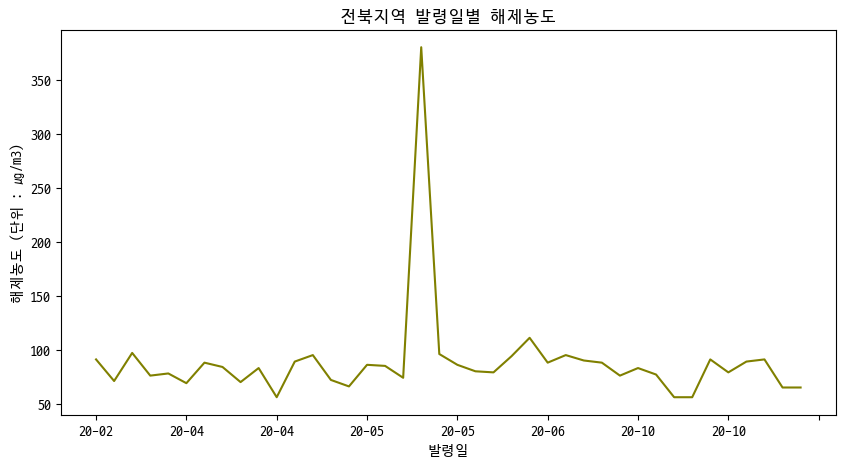

In [33]:
## 전북지역 발령일별 해제농도
plt.rc('font', family='d2coding')

j_b[['발령일', '해제농도']].plot(x='발령일',
                                    figsize=(10, 5),
                                   legend=False,
                                   rot=0,
                                   title='전북지역 발령일별 해제농도',
                                   xlabel='발령일',
                                   ylabel='해제농도 (단위 : ㎍/m3)',
                                   color='olive',
                                  )

plt.xticks(ha='center')
plt.show()

<Axes: xlabel='발령일', ylabel='해제농도'>

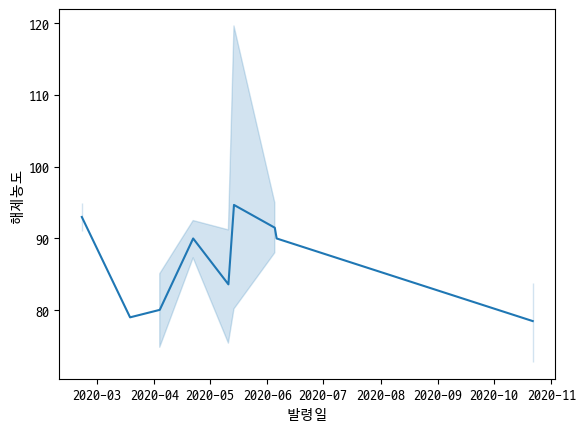

In [34]:
## 전북지역 발령일별 해제농도
sns.lineplot(data=dust_table,
             x='발령일',
             y='해제농도',
            )

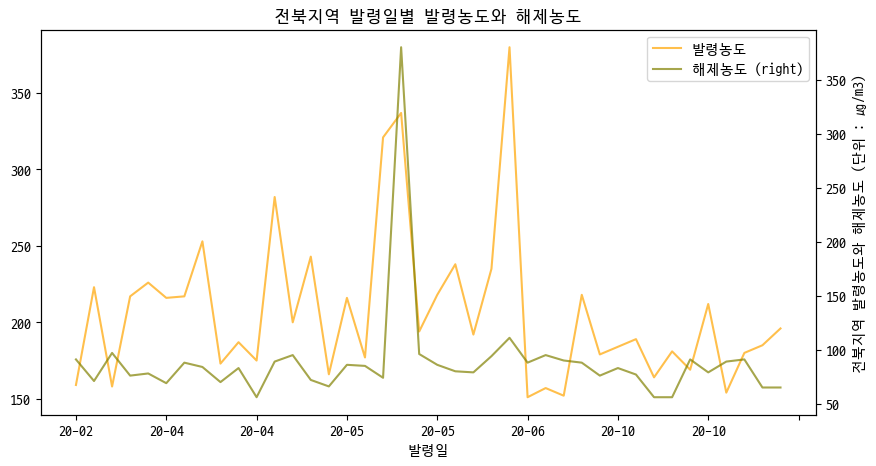

In [35]:
## 전북지역 발령일별 발령농도와 해제농도
plt.rc('font', family='d2coding')

j_b[['발령일', '발령농도', '해제농도']].plot(x='발령일',
                                                figsize=(10, 5),
                                               #legend=False,
                                               rot=0,
                                               title='전북지역 발령일별 발령농도와 해제농도',
                                               xlabel='발령일',
                                               ylabel='전북지역 발령농도와 해제농도 (단위 : ㎍/m3)',
                                               color=['orange', 'olive'],
                                               secondary_y='해제농도',
                                               alpha=0.7,
                                              )

plt.xticks(ha='center')
plt.show()

- [가설 1] 전북지역 월별 발령농도, 해제농도가 가장 높았던 달은 4~5월달일 것이다.
    - 2020년 2월 22일 ~ 2020년 10월 22일 기간 중 발령농도가 가장 높았던 월은 2020년 5월로 380㎍/m3이었고, 해제농도가 가장 높았던 날은 2020년 5월로 380㎍/m3이었다.

## [가설 2] 전북지역 발령농도가 가장 높은 것은 군산권역일 것이다.

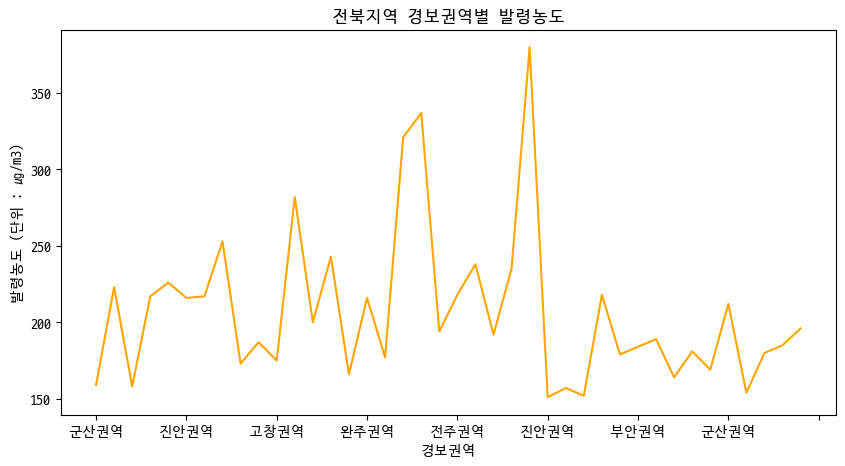

In [36]:
## 전북지역 경보권역별 발령농도
plt.rc('font', family='d2coding')

j_b[['경보권역', '발령농도']].plot(x='경보권역',
                                figsize=(10, 5),
                               legend=False,
                               rot=0,
                               title='전북지역 경보권역별 발령농도',
                               xlabel='경보권역',
                               ylabel='발령농도 (단위 : ㎍/m3)',
                               color='orange',
                              )

plt.xticks(ha='center')
plt.show()

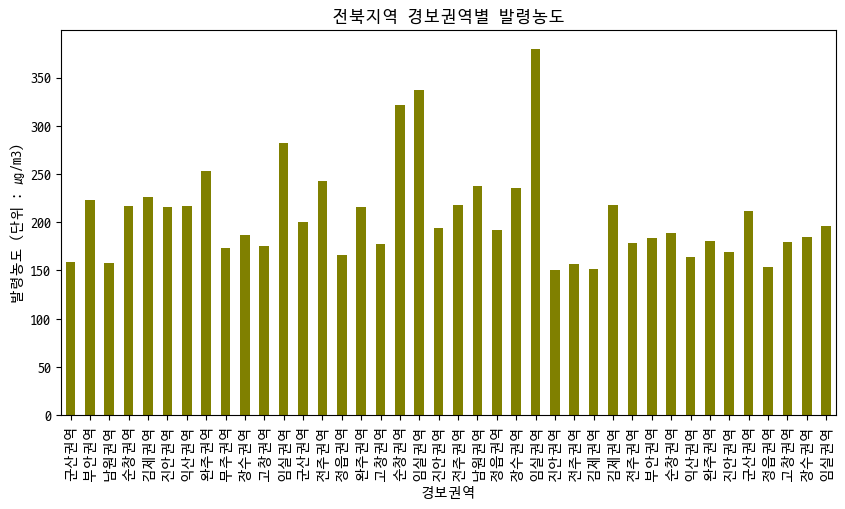

In [37]:
plt.rc('font', family='d2coding')

j_b[['경보권역', '발령농도']].plot(kind='bar',
                                x='경보권역',
                                figsize=(10, 5),
                                legend=False,
                                rot=90,
                                title='전북지역 경보권역별 발령농도',
                                xlabel='경보권역',
                                ylabel='발령농도 (단위 : ㎍/m3)',
                                color='olive',  # colors 리스트를 color 매개변수에 전달
                               )

plt.xticks(ha='center')
plt.show()

- [가설 2] 전북지역 발령농도가 가장 높은 권역은 군산권역일 것이다.
    - 전북지역의 권역별 발령농도를 구한 결과, 발령농도가 가장 높은 경보권역은 임실권역으로 발령농도가 380㎍/m3으로 나타났다.
    - 반면, 군산권역의 발령농도가 가장 높았을 때는 212㎍/m3로 임실권역의 발령농도보다 88㎍/m3 낮았다.

## [가설 3] 미세먼지 주의보가 가장 많은 시간대는 오후 2시일 것이다.

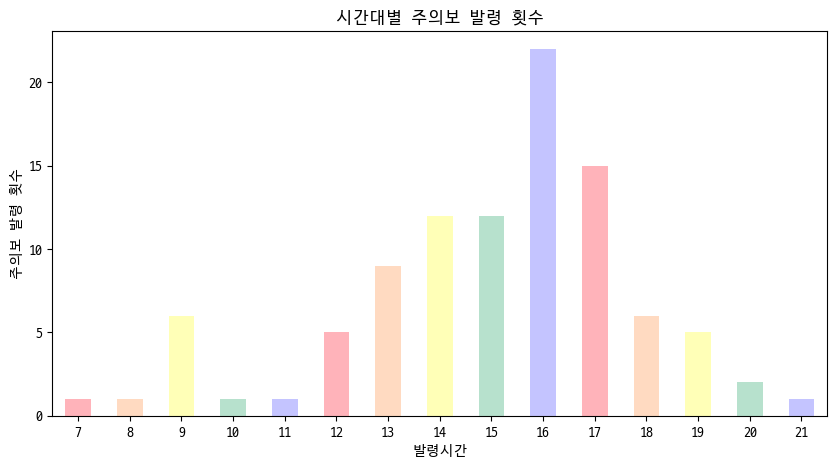

In [64]:
plt.rc('font', family='d2coding')

pastel_colors = ['#FFB3BA', '#FFDAC1', '#FFFFB7', '#B7E1CD', '#C4C4FF']

h_counts.plot(kind='bar',
            figsize=(10, 5),
            legend=False,
            rot=0,
            title='시간대별 주의보 발령 횟수',
            xlabel='발령시간',
            ylabel='주의보 발령 횟수',
            color=pastel_colors  # colors 리스트를 color 매개변수에 전달
           )

plt.xticks(ha='center')
plt.show()

- [가설 3] 미세먼지 주의보가 가장 많은 시간대는 오후 2시일 것이다.
    - 미세먼지 주의보가 가장 많은 시간대는 14시가 아닌 16시로 나왔다. 
    - 16시의 미세먼지 주의보는 총 22번이 발령됬으며, 반면 14시의 미세먼지 주의보는 총 12번이 발령되었고, 미세먼지 주의보가 가장 적은 시간       대는 7시, 8시, 10시, 11시, 21시로 각각 총 한번씩 발령되었다.